
Step 1: reward=1, steps=10
Transition: Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.5   0.5  ]]
Is Markov Chain regular? Yes

Step 2: reward=1, steps=12
Transition: Don't Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.333 0.667]]
Is Markov Chain regular? Yes

Step 3: reward=1, steps=20
Transition: Don't Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.25  0.75 ]]
Is Markov Chain regular? Yes

Step 4: reward=1, steps=25
Transition: Don't Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.2   0.8  ]]
Is Markov Chain regular? Yes

Step 5: reward=1, steps=10
Transition: Don't Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.167 0.833]]
Is Markov Chain regular? Yes

Step 6: reward=1, steps=12
Transition: Don't Trust → Don't Trust
Transition Probability Matrix:
[[0.333 0.667]
 [0.143 0.857]]
Is Markov Chain regular? Yes

Step 7: reward=1, steps=20
Transition: Don't Trust → Don't Trus

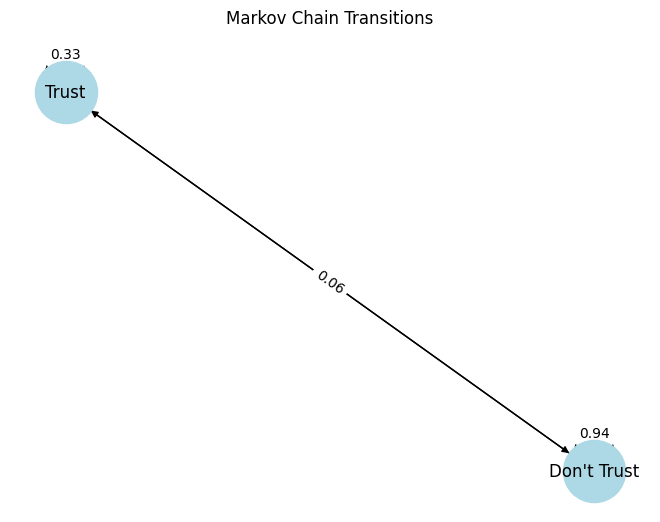

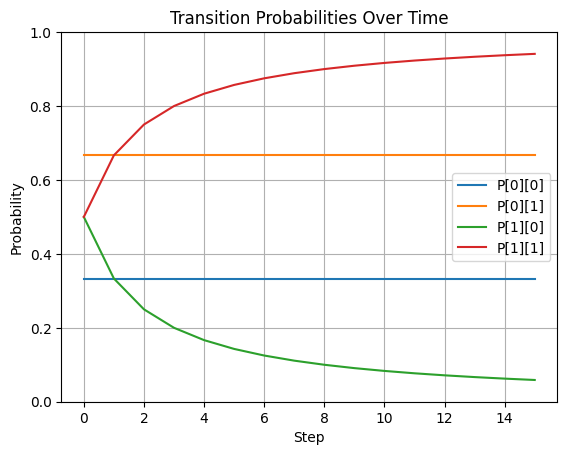

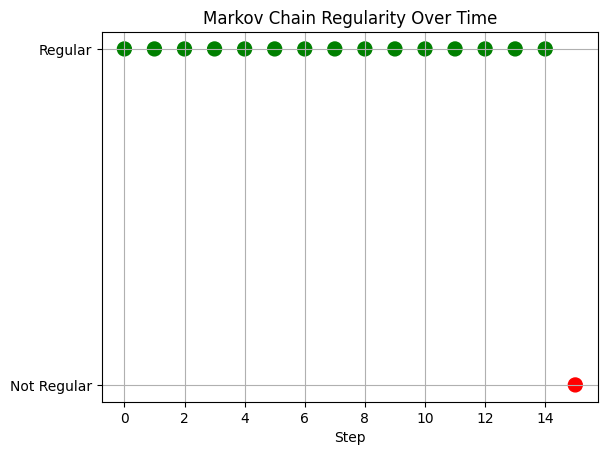

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Meta-level states
TRUST = 0
DONT_TRUST = 1
state_names = ['Trust', 'Don\'t Trust']

# Experience threshold
THRESHOLD = 0.15

# Initial transition count matrix
transition_counts = np.array([  # Basically 0.5 for each probability
    [1, 1],  # From TRUST: [to TRUST, to DONT_TRUST]
    [1, 1]   # From DONT_TRUST: [to TRUST, to DONT_TRUST]
], dtype=float)

def experience_score(reward, steps):
    return reward / steps if steps > 0 else 0

def update_markov_chain(current_state, reward, steps):
    global transition_counts

    exp = experience_score(reward, steps)
    next_state = TRUST if exp >= THRESHOLD else DONT_TRUST

    # Update counts
    transition_counts[current_state, next_state] += 1

    return next_state

def get_transition_probs():
    row_sums = transition_counts.sum(axis=1, keepdims=True)
    return transition_counts / row_sums

def is_regular(P, max_power=10, tolerance=0.06):
    P = np.where(P < tolerance, 0, P)  # Optional: zero out near-zero probs
    power = np.copy(P)

    for k in range(1, max_power + 1):
        if np.all(power > 0):
            return True
        power = np.matmul(power, P)
        power = np.where(power < tolerance, 0, power)

    return False

def draw_markov_chain(P, state_labels):
    G = nx.MultiDiGraph()
    for i in range(len(P)):
        for j in range(len(P)):
            prob = P[i][j]
            if prob > 0:
                G.add_edge(state_labels[i], state_labels[j], weight=prob)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Markov Chain Transitions")
    plt.show()

def plot_probabilities_over_time(prob_history):
    prob_history = np.array(prob_history)
    steps = np.arange(len(prob_history))
    labels = ['P[0][0]', 'P[0][1]', 'P[1][0]', 'P[1][1]']

    for i in range(4):
        plt.plot(steps, prob_history[:, i], label=labels[i])
    
    plt.title("Transition Probabilities Over Time")
    plt.xlabel("Step")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_regularity(reg_flags):
    steps = np.arange(len(reg_flags))
    plt.scatter(steps, reg_flags, c=['green' if r else 'red' for r in reg_flags], s=100)
    plt.yticks([0, 1], ['Not Regular', 'Regular'])
    plt.title("Markov Chain Regularity Over Time")
    plt.xlabel("Step")
    plt.grid(True)
    plt.show()

# Simulate historical data
historical_data = [
    (1, 10), (1, 12), (1, 20), (1, 25),
    (1, 10), (1, 12), (1, 20), (1, 25),
    (1, 10), (1, 12), (1, 20), (1, 25),
    (1, 10), (1, 12), (1, 20), (1, 25)
]

# Start in TRUST state
current_state = TRUST
prob_history = []
regularity_flags = []

for i, (reward, steps) in enumerate(historical_data):
    print(f"\nStep {i+1}: reward={reward}, steps={steps}")
    new_state = update_markov_chain(current_state, reward, steps)
    print(f"Transition: {state_names[current_state]} → {state_names[new_state]}")
    
    P = get_transition_probs()
    prob_history.append(P.flatten())
    print("Transition Probability Matrix:")
    print(np.round(P, 3))

    regular = is_regular(P)
    regularity_flags.append(1 if regular else 0)
    print(f"Is Markov Chain regular? {'Yes' if regular else 'No'}")

    current_state = new_state

# Final matrix
final_P = get_transition_probs()
print("\nFinal Transition Probability Matrix:")
print(np.round(final_P, 3))

# Visualizations
draw_markov_chain(final_P, state_names)
plot_probabilities_over_time(prob_history)
plot_regularity(regularity_flags)